In [1]:
import pandas as pd
import yfinance as yf

In [2]:
tickers=["NDAQ","^NSEI"] #Loading NSEI and NDAQ data 
df=pd.DataFrame()
for ticker in tickers:
    df_tick=yf.download(ticker,start="2010-01-01",end="2023-05-01")
    df_tick["Ticker"]=ticker
    df=pd.concat([df,df_tick])
df.dropna()  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2010-01-04,6.640000,6.810000,6.633333,6.746667,5.635402,6514500,NDAQ
2010-01-05,6.643333,6.773333,6.643333,6.766667,5.652108,4445100,NDAQ
2010-01-06,6.733333,6.786667,6.720000,6.763333,5.649324,7340100,NDAQ
2010-01-07,6.750000,6.766667,6.630000,6.673333,5.574146,8498400,NDAQ
2010-01-08,6.676667,6.766667,6.626667,6.743333,5.632617,4347600,NDAQ
...,...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,^NSEI
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,^NSEI
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,^NSEI


In [3]:
df_new=df.pivot_table(index=['Date'],columns="Ticker",values=['Adj Close'])
df_new.columns = [col[1] for col in df_new.columns.values]
df_new
df_new["NSEI"]=df_new["^NSEI"]

df_new

,NDAQ,^NSEI,NSEI
Date,,,
2010-01-04,5.635402,5232.200195,5232.200195
2010-01-05,5.652108,5277.899902,5277.899902
2010-01-06,5.649324,5281.799805,5281.799805
2010-01-07,5.574146,5263.100098,5263.100098
2010-01-08,5.632617,5244.750000,5244.750000
...,...,...,...
2023-04-24,56.580002,17743.400391,17743.400391
2023-04-25,55.270000,17769.250000,17769.250000
2023-04-26,54.130001,17813.599609,17813.599609


In [4]:
df_final=df_new.drop(["^NSEI"],axis=1)


In [5]:
df_final

,NDAQ,NSEI
Date,,
2010-01-04,5.635402,5232.200195
2010-01-05,5.652108,5277.899902
2010-01-06,5.649324,5281.799805
2010-01-07,5.574146,5263.100098
2010-01-08,5.632617,5244.750000
...,...,...
2023-04-24,56.580002,17743.400391
2023-04-25,55.270000,17769.250000
2023-04-26,54.130001,17813.599609


In [6]:
df_final.corr() #Since correlation coefficient between NDAQ and ^NSEI is 0.977373 which is very close to +1, so we can say
               # that they are highly linearly related

,NDAQ,NSEI
NDAQ,1.000000,0.977373
NSEI,0.977373,1.000000


In [7]:
df_final["NDAQ_lead"]=df_final.NDAQ.shift(-1)  
df_final["NSEI_lead"]=df_final.NSEI.shift(-1)
df_final

,NDAQ,NSEI,NDAQ_lead,NSEI_lead
Date,,,,
2010-01-04,5.635402,5232.200195,5.652108,5277.899902
2010-01-05,5.652108,5277.899902,5.649324,5281.799805
2010-01-06,5.649324,5281.799805,5.574146,5263.100098
2010-01-07,5.574146,5263.100098,5.632617,5244.750000
2010-01-08,5.632617,5244.750000,5.646539,5249.399902
...,...,...,...,...
2023-04-24,56.580002,17743.400391,55.270000,17769.250000
2023-04-25,55.270000,17769.250000,54.130001,17813.599609
2023-04-26,54.130001,17813.599609,54.820000,17915.050781


In [8]:
df_final.corr() #Keeping NSEI in lead by 1 day we are getting a better correlation i.e 0.977496

,NDAQ,NSEI,NDAQ_lead,NSEI_lead
NDAQ,1.000000,0.977373,0.999661,0.977496
NSEI,0.977373,1.000000,0.977049,0.999653
NDAQ_lead,0.999661,0.977049,1.000000,0.977365
NSEI_lead,0.977496,0.999653,0.977365,1.000000


In [9]:
df_final.NSEI.shift(-1).corr(df_final.NDAQ)

0.977496119503044

In [10]:
for i in range(20):
    print("NSEI Lead_Day",i,df_final.NSEI.shift(-i).corr(df_final.NDAQ)) # NSEI is a leading as correlation is improving as lead day increases
    

NSEI Lead_Day 0 0.9773730205609968
NSEI Lead_Day 1 0.977496119503044
NSEI Lead_Day 2 0.97756173877628
NSEI Lead_Day 3 0.9776050181953183
NSEI Lead_Day 4 0.9775982840621145
NSEI Lead_Day 5 0.977509651390463
NSEI Lead_Day 6 0.9773851760913947
NSEI Lead_Day 7 0.9772519806172987
NSEI Lead_Day 8 0.9771666735387613
NSEI Lead_Day 9 0.977036786271473
NSEI Lead_Day 10 0.9769688552776818
NSEI Lead_Day 11 0.9768381267227538
NSEI Lead_Day 12 0.9767555273614638
NSEI Lead_Day 13 0.9766195388434683
NSEI Lead_Day 14 0.9764722551020645
NSEI Lead_Day 15 0.9763126174399228
NSEI Lead_Day 16 0.9762351834077325
NSEI Lead_Day 17 0.9761663428258947
NSEI Lead_Day 18 0.9761414426490244
NSEI Lead_Day 19 0.976002155779206


In [11]:
for i in range(20):
    print("NDAQ Lead_Day",i,df_final.NDAQ.shift(-i).corr(df_final.NSEI))#Since correlation is decreasing as NDAQ lead is increasing, NDAQ must be  lagging indicator
    #As NSEI leading we can use NSEI index to determine future price or predict the behaiviour of NDAQ and hence can be used for parameter optimization

NDAQ Lead_Day 0 0.9773730205609968
NDAQ Lead_Day 1 0.9770493964197539
NDAQ Lead_Day 2 0.976871609162835
NDAQ Lead_Day 3 0.9766277205528016
NDAQ Lead_Day 4 0.9763422810194805
NDAQ Lead_Day 5 0.9759866286969132
NDAQ Lead_Day 6 0.9756576618751203
NDAQ Lead_Day 7 0.9754012996337698
NDAQ Lead_Day 8 0.9750780150097419
NDAQ Lead_Day 9 0.9748036749723806
NDAQ Lead_Day 10 0.9744972207202793
NDAQ Lead_Day 11 0.9742510999764922
NDAQ Lead_Day 12 0.973920342326964
NDAQ Lead_Day 13 0.9735518814595322
NDAQ Lead_Day 14 0.9733337210689869
NDAQ Lead_Day 15 0.9729833220154837
NDAQ Lead_Day 16 0.9726791714607586
NDAQ Lead_Day 17 0.9723556394592525
NDAQ Lead_Day 18 0.9720662261985562
NDAQ Lead_Day 19 0.9717915478643611


In [12]:
df_nsei=yf.download("^NSEI",start="2010-01-01",end="2023-05-01")
df_nsei

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000


In [367]:
#keltner channel
def get_kc(high, low, close, kc_lookback, multiplier, atr_lookback):   # parameter to be optimized are kc_lookback, multiplier,atr_lookback
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
    
    return kc_middle, kc_upper, kc_lower
df_nsei=df_nsei.iloc[:,:4]


df_nsei['kc_middle'], df_nsei['kc_upper'],df_nsei['kc_lower'] = get_kc(df_nsei['High'], df_nsei['Low'], df_nsei['Close'], 6, 2, 10)
df_nsei

,Open,High,Low,Close,kc_middle,kc_upper,kc_lower
Date,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,5374.900391,5089.500000
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5256.807730,5383.507720,5130.107740
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5266.450341,5383.888559,5149.012124
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5265.410401,5382.313984,5148.506819
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5259.917585,5368.810625,5151.024545
...,...,...,...,...,...,...,...
2023-04-13,17807.300781,17842.150391,17729.650391,17828.000000,17503.831172,17825.128752,17182.533591
2023-04-17,17863.000000,17863.000000,17574.050781,17706.849609,17532.833806,17879.791472,17185.876140
2023-04-18,17766.599609,17766.599609,17610.199219,17660.150391,17551.021889,17894.563867,17207.479912


In [368]:
#implementation of Keltner
import numpy as np
def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal



In [369]:
buy_price, sell_price, kc_signal = implement_kc_strategy(df_nsei['Close'], df_nsei['kc_upper'], df_nsei['kc_lower'])
df_nsei=df_nsei.iloc[:-1,:]


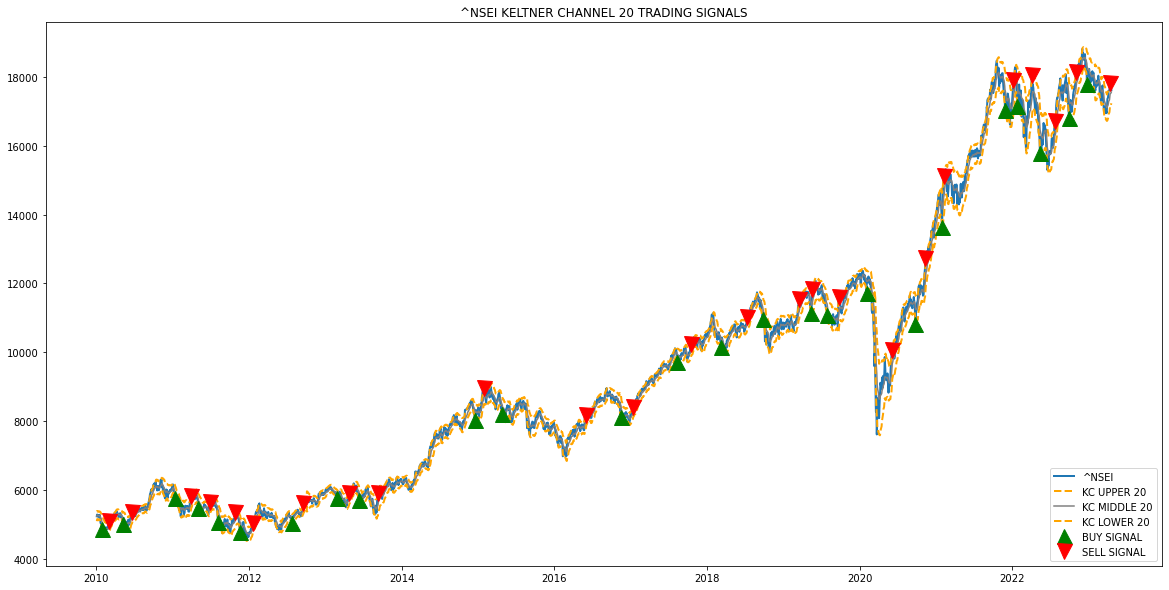

In [370]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df_nsei['Close'], linewidth = 2, label = '^NSEI')
plt.plot(df_nsei['kc_upper'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
plt.plot(df_nsei['kc_middle'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(df_nsei['kc_lower'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.plot(df_nsei.index, buy_price, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(df_nsei.index, sell_price, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'lower right')
plt.title('^NSEI KELTNER CHANNEL 20 TRADING SIGNALS')
plt.show()


In [371]:
buy_kc=pd.DataFrame(buy_price)
buy_kc=buy_kc.fillna(0)
buy_kc=buy_kc[~(buy_kc == 0).all(axis=1)]
sell_kc=pd.DataFrame(sell_price)
sell_kc=sell_kc.fillna(0)
sell_kc=sell_kc[~(sell_kc == 0).all(axis=1)]

In [372]:
np1=np.array(buy_kc)
np2=np.array(sell_kc)
(np2-np1).mean()
(np2-np1).std()

646.0614034485938

In [373]:
buy_kelt=pd.DataFrame(buy_price)
sell_kelt=pd.DataFrame(sell_price)
buy_kelt=buy_kelt.fillna(0)
sell_kelt=sell_kelt.fillna(0)


In [374]:
import math
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(np2-np1)

0.7762358088826048

In [375]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np2-np1)

0.6225700666054036

In [376]:
print("MDD_KC",(np1-np2).min()/np2[18,0]*100,"%")


MDD_KC -15.244942026620953 %


In [414]:

print("CUMM_Return_KC",((np2-np1)/np1).max()*100,"%")

CUMM_Return_KC 17.98705869732197 %


In [327]:
pd.DataFrame(np1-np2).idxmin()

0    18
dtype: int64

In [23]:
df_nsei_bb=yf.download("^NSEI",start="2010-01-01",end="2023-05-01")
df_nsei_bb

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000


In [24]:
#Bollinger Bands indicator
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma
df_nsei_bb["SMA9"]=sma(df_nsei_bb["Close"],5)

def bollinger_bands(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2.06
    lower_bb = sma - std * 2.06
    return upper_bb, lower_bb


In [25]:
df_nsei_bb['upper_bb'], df_nsei_bb['lower_bb'] = bollinger_bands(df_nsei_bb['Close'], df_nsei_bb['SMA9'], 10)
df_nsei_bb

,Open,High,Low,Close,Adj Close,Volume,SMA9,upper_bb,lower_bb
Date,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,NaN,NaN,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,NaN,NaN,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,NaN,NaN,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,5259.950000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,17654.160156,17817.743998,17490.576315
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,17675.980078,17836.586339,17515.373818
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,17714.950000,17889.041945,17540.858055


In [26]:
#implementing Bollinger bands
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price_bb = []
    sell_price_bb = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price_bb.append(data[i])
                sell_price_bb.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price_bb.append(np.nan)
            sell_price_bb.append(np.nan)
            bb_signal.append(0)
            
    return buy_price_bb, sell_price_bb, bb_signal

buy_price_bb, sell_price_bb, bb_signal = implement_bb_strategy(df_nsei_bb['Close'], df_nsei_bb['lower_bb'], df_nsei_bb['upper_bb'])


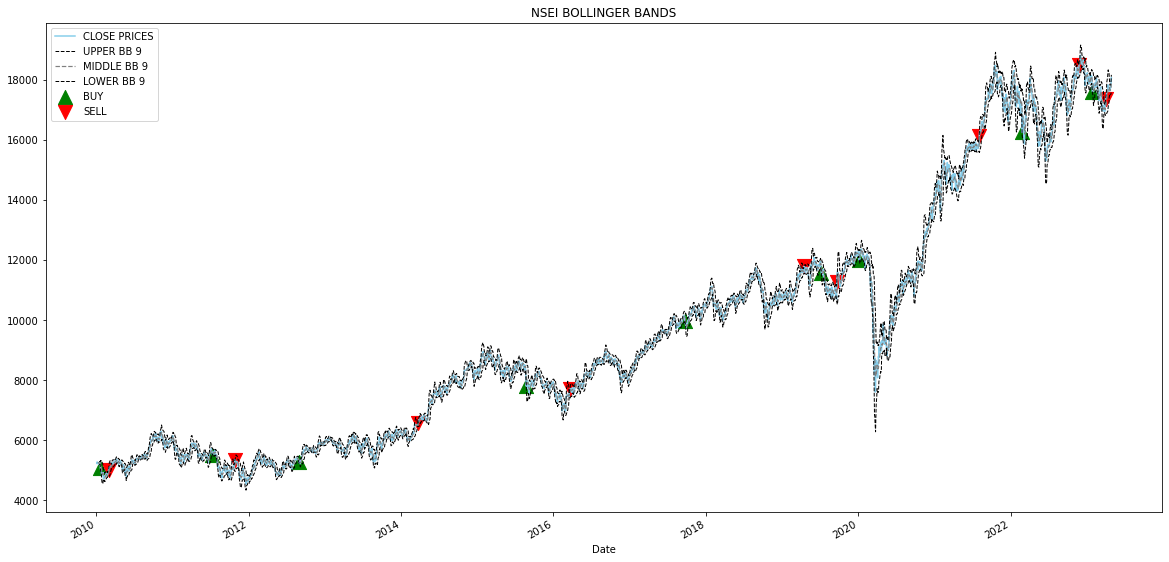

In [27]:
plt.figure(figsize=(20,10))
df_nsei_bb['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df_nsei_bb['upper_bb'].plot(label = 'UPPER BB 9', linestyle = '--', linewidth = 1, color = 'black')
df_nsei_bb['SMA9'].plot(label = 'MIDDLE BB 9', linestyle = '--', linewidth = 1.2, color = 'grey')
df_nsei_bb['lower_bb'].plot(label = 'LOWER BB 9', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df_nsei_bb.index, buy_price_bb, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_nsei_bb.index, sell_price_bb, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('NSEI BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.title('NSEI BOLLINGER BANDS')
plt.show()

In [28]:
buy_price_bb=pd.DataFrame(buy_price_bb)
buy_price_bb=buy_price_bb.fillna(0)
buy_price_bb=buy_price_bb[~(buy_price_bb == 0).all(axis=1)]
sell_price_bb=pd.DataFrame(sell_price_bb)
sell_price_bb=sell_price_bb.fillna(0)
sell_price_bb=sell_price_bb[~(sell_price_bb == 0).all(axis=1)]

In [29]:
np_buy_bb=np.array(buy_price_bb)
np_sell_bb=np.array(sell_price_bb)
(np_sell_bb-np_buy_bb).mean()


957.3279079861111

In [30]:
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_bb-np_buy_bb)

0.657859301566638

In [31]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_bb-np_buy_bb)

12.077910403811186

In [328]:
pd.DataFrame(np_buy_bb-np_sell_bb).idxmin()

0    6
dtype: int64

In [329]:
print("MDD_BB",(np_buy_bb-np_sell_bb).min()/np_sell_bb[6,0]*100,"%")


MDD_BB -25.651009378438694 %


In [416]:
print("CUMM_Return_BB",((np_sell_bb-np_buy_bb)/np_buy_bb).max()*100,"%")

CUMM_Return_BB 34.50081724579576 %


In [32]:
#macd
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df['Close']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df


In [297]:
#df_nsei_macd = computeMACD(df_nsei, 34, 89, 34)
#df_nsei_macd = computeMACD(df_nsei, 35, 90, 35)
df_nsei_macd = computeMACD(df_nsei, 52, 112, 52) #best so far


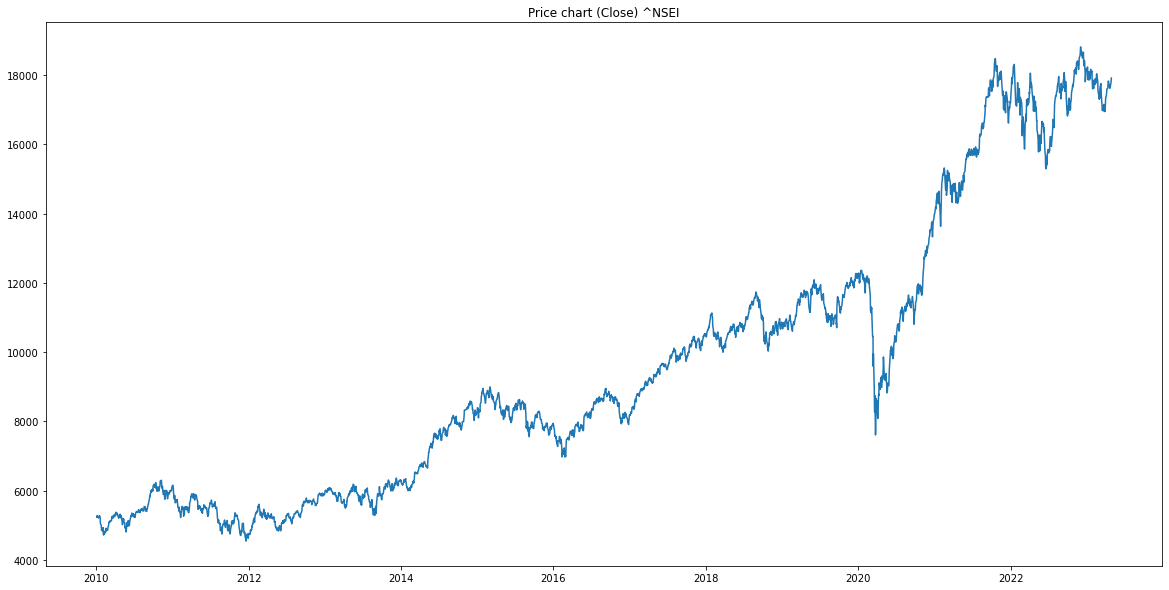

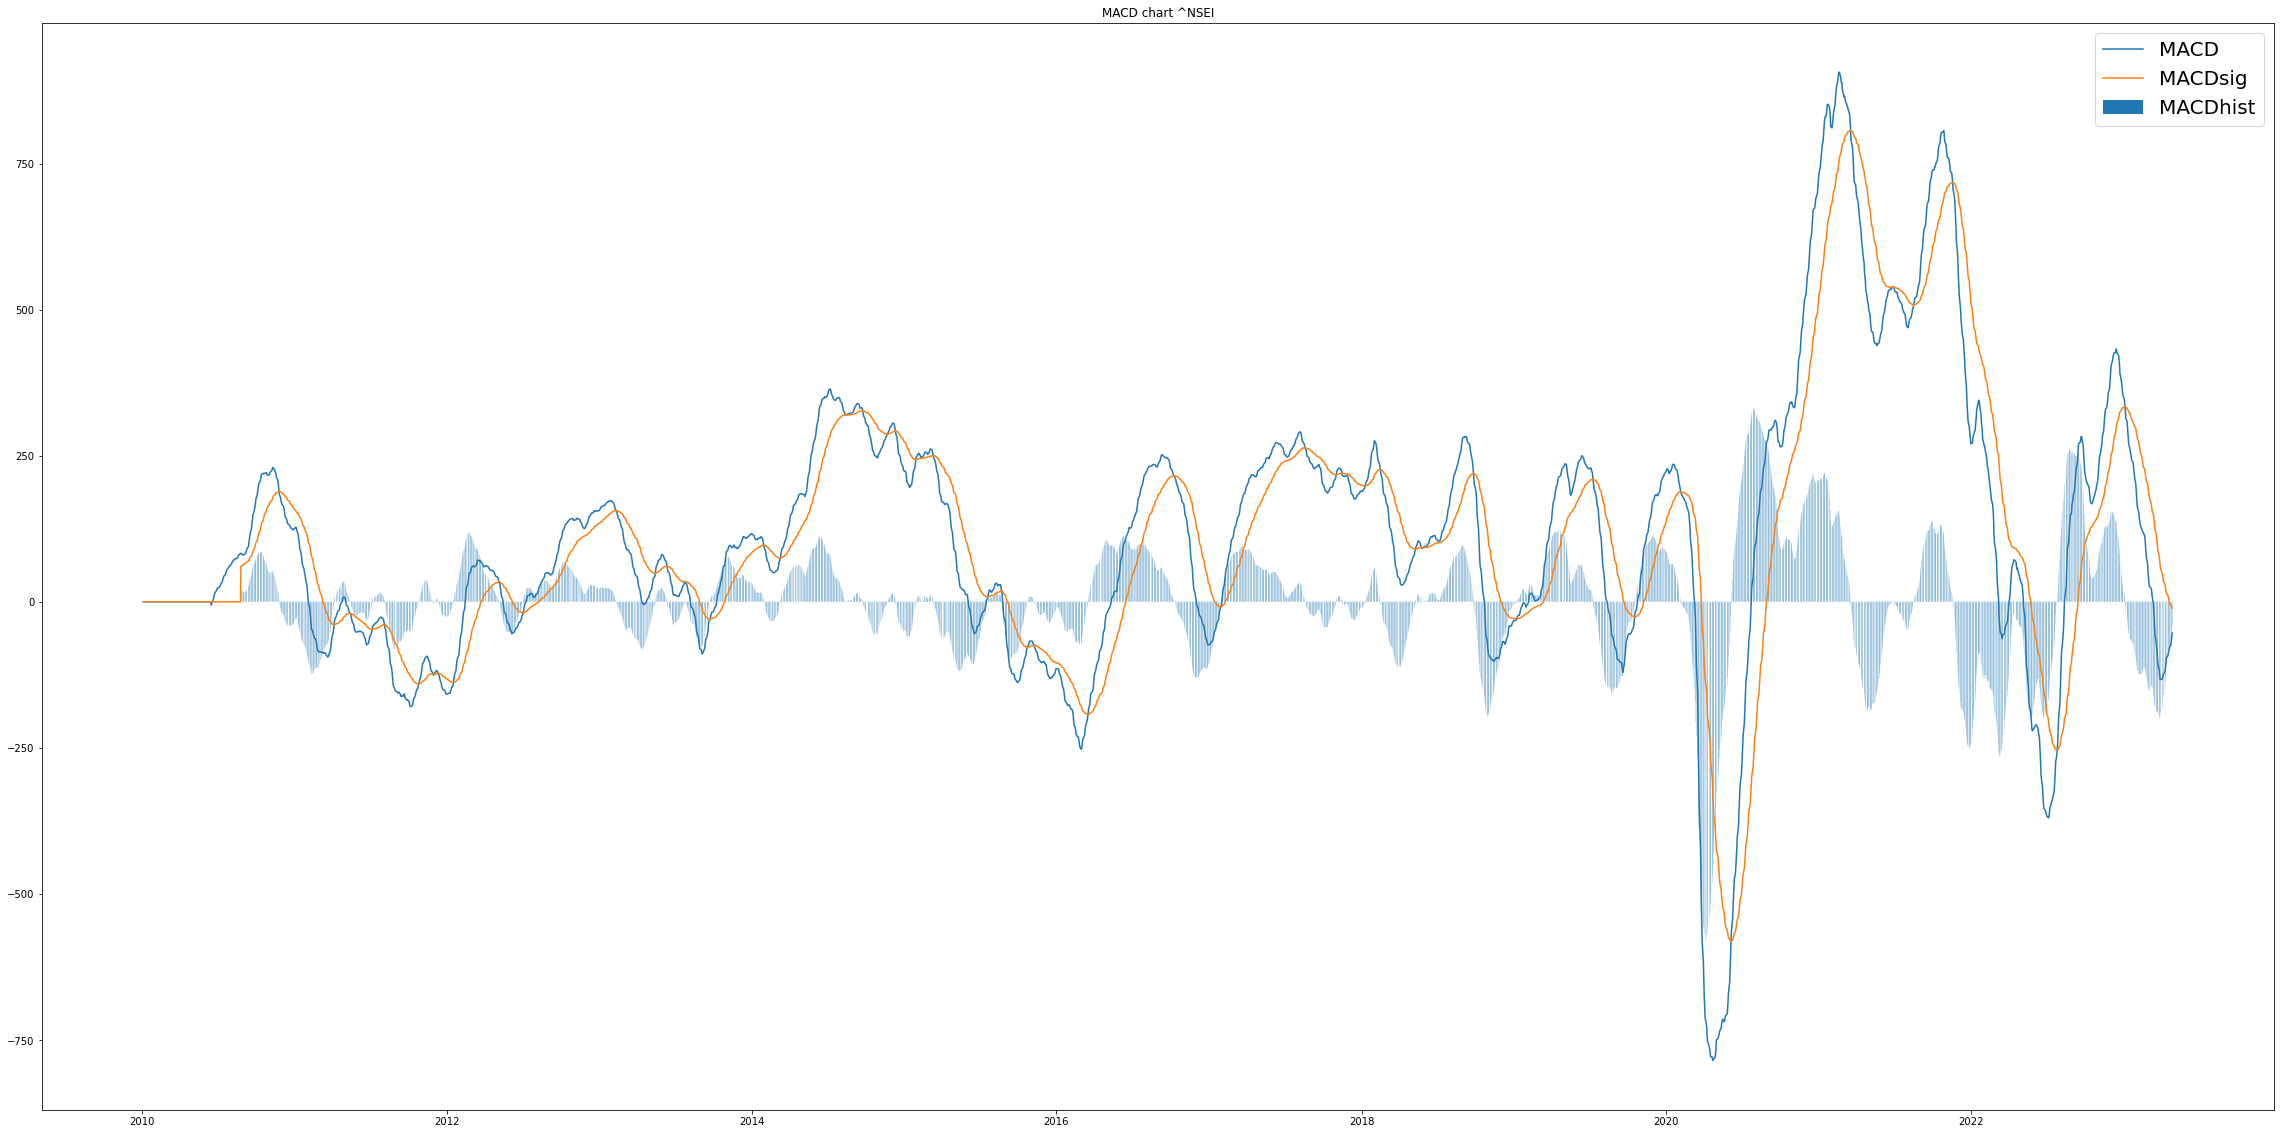

In [298]:
plt.figure(figsize=(20,10))
plt.plot( df_nsei_macd['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(40,20))
plt.title('MACD chart ' + str(ticker))
plt.plot(df_nsei_macd['MACD'].fillna(0),label='MACD')
plt.plot(df_nsei_macd['MACDsig'].fillna(0),label='MACDsig')
plt.bar(df_nsei.index, df_nsei_macd['MACDhist'].fillna(0),width=0.5, snap=False,label='MACDhist')

plt.legend(fontsize="20")
plt.show()

In [299]:
def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACDsig'][i]:         # first occurence of MACD crossing above signal oine
            sell_list.append(np.nan)                 # so first flip above means buy
            if flag != 1:                            # after first occurence I record flip to ignore
                buy_list.append(df['Close'][i])      # from here onward
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACDsig'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = generate_signals(df_nsei_macd)
df_nsei_macd['buy_sig'] = signal[0]
df_nsei_macd['sell_sig'] = signal[1]


In [300]:
df_nsei_macd

,Open,High,Low,Close,kc_middle,kc_upper,kc_lower,MACD,MACDsig,MACDhist,buy_sig,sell_sig
Date,,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,5374.900391,5089.500000,NaN,NaN,NaN,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5256.807730,5383.507720,5130.107740,NaN,NaN,NaN,NaN,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5266.450341,5383.888559,5149.012124,NaN,NaN,NaN,NaN,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5265.410401,5382.313984,5148.506819,NaN,NaN,NaN,NaN,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5259.917585,5368.810625,5151.024545,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21,17639.750000,17663.199219,17553.949219,17624.050781,17577.554180,17881.844938,17273.263422,-78.240035,-2.375795,-75.864241,NaN,NaN
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17601.246495,17903.508178,17298.984813,-72.985252,-5.040302,-67.944949,NaN,NaN
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17625.246996,17915.402432,17335.091560,-67.451570,-7.395445,-60.056125,NaN,NaN


In [301]:
buy_sig_md=pd.DataFrame(df_nsei_macd['buy_sig']).fillna(0)
buy_sig_md

buy_sig_md=buy_sig_md[~(buy_sig_md == 0).all(axis=1)]
buy_sig_md
np_buy_md=np.array(buy_sig_md)

sell_sig_md=pd.DataFrame(df_nsei_macd['sell_sig']).fillna(0)
sell_sig_md

sell_sig_md=sell_sig_md[~(sell_sig_md == 0).all(axis=1)]
sell_sig_md
np_sell_md=np.array(sell_sig_md)

#np_buy_md=np.delete(np_buy_md,40,0)


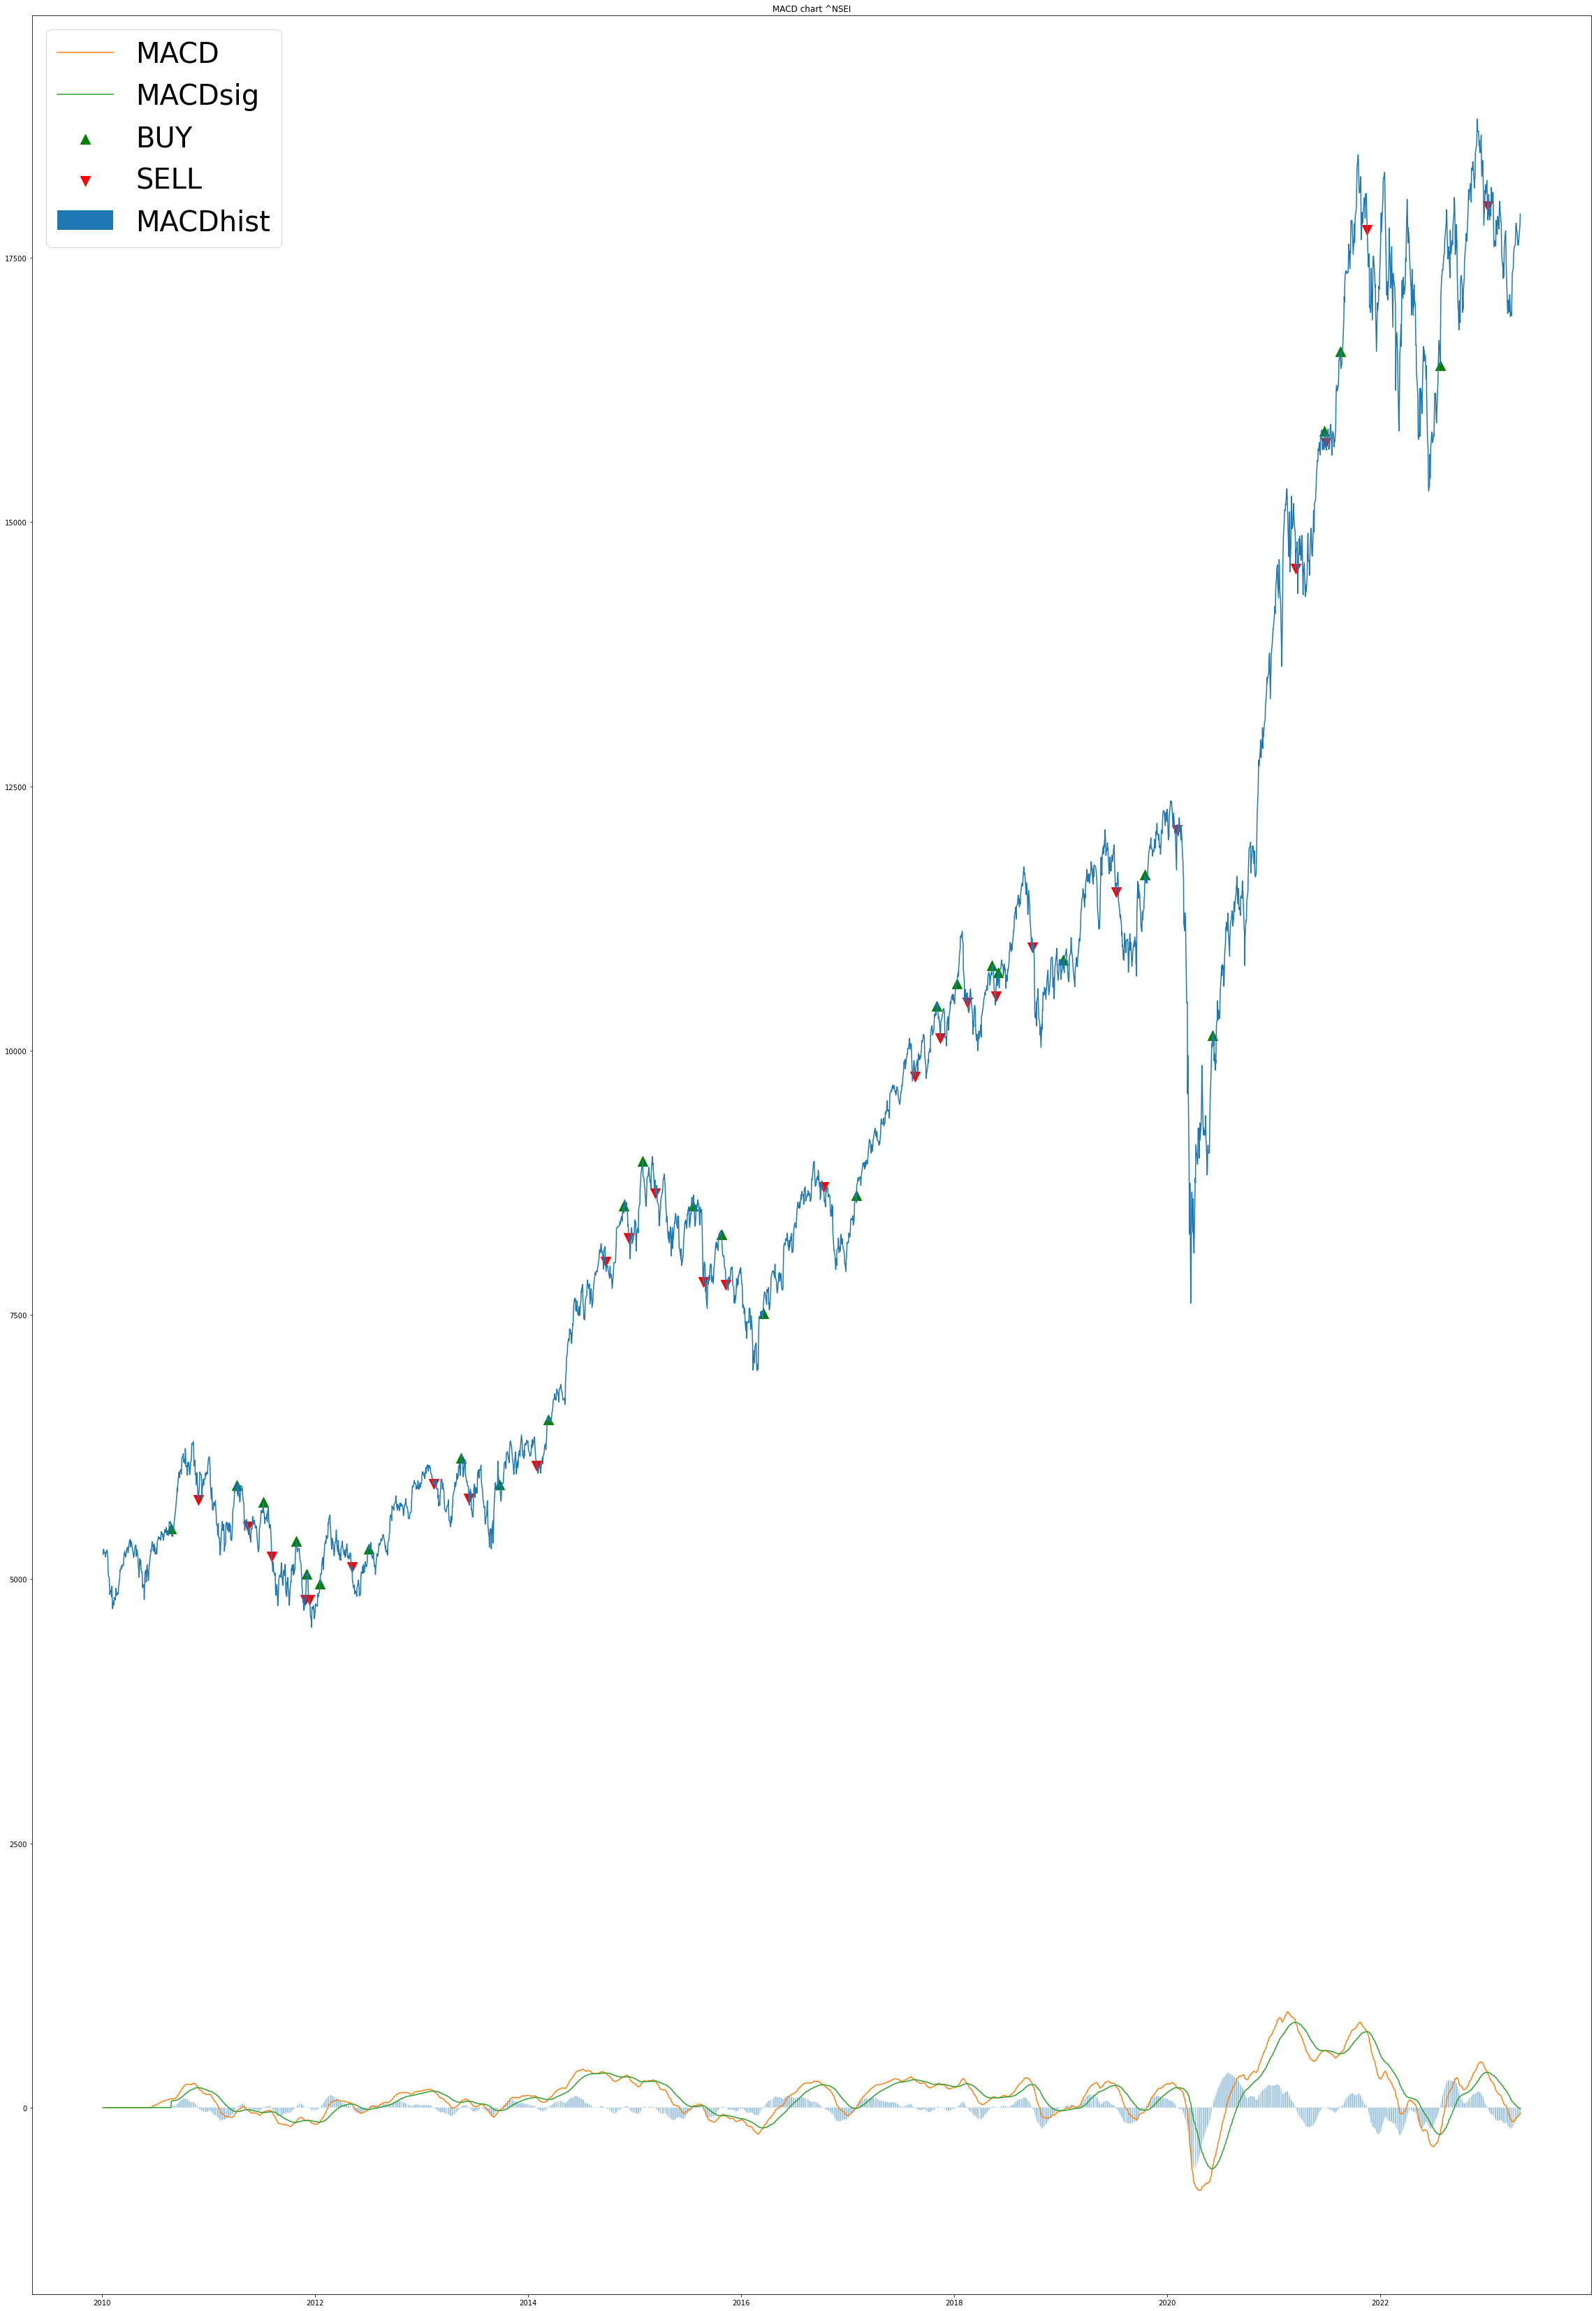

In [302]:
plt.figure(figsize=(40,60))
plt.plot( df_nsei_macd['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.title('MACD chart ' + str(ticker))
plt.plot(df_nsei_macd['MACD'].fillna(0),label='MACD')
plt.plot(df_nsei_macd['MACDsig'].fillna(0),label='MACDsig')
plt.bar( df_nsei.index,df_nsei_macd['MACDhist'].fillna(0),width=0.5, snap=False,label='MACDhist')
plt.scatter(df_nsei_macd.index, df_nsei_macd.buy_sig, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_nsei_macd.index, df_nsei_macd.sell_sig, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(fontsize="40")
plt.show()

In [303]:

(np_sell_md-np_buy_md).mean()

331.6904109074519

In [304]:
def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_return/sigma)

sharpe_ratio(np_sell_md-np_buy_md)

0.3173554557035216

In [305]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(np_sell_md-np_buy_md)

2.091867723582485

In [330]:
pd.DataFrame(np_buy_md-np_sell_md).idxmin()

0    22
dtype: int64

In [332]:
print("MDD_MACD",(np_buy_md-np_sell_md).min()/np_sell_md[22,0]*100,"%")


MDD_MACD -30.33208432038182 %


In [417]:
print("CUMM_Return_MACD",((np_sell_md-np_buy_md)/np_buy_md).max()*100,"%")

CUMM_Return_BB 43.53809644581584 %


In [224]:
df_ndaq=yf.download("NDAQ",start="2010-01-01",end="2023-05-01")  #Using other index and Applying optimized parameters to the other index
df_ndaq

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.640000,6.810000,6.633333,6.746667,5.635403,6514500
2010-01-05,6.643333,6.773333,6.643333,6.766667,5.652108,4445100
2010-01-06,6.733333,6.786667,6.720000,6.763333,5.649322,7340100
2010-01-07,6.750000,6.766667,6.630000,6.673333,5.574148,8498400
2010-01-08,6.676667,6.766667,6.626667,6.743333,5.632617,4347600
...,...,...,...,...,...,...
2023-04-24,57.090000,57.209999,56.189999,56.580002,56.580002,1775400
2023-04-25,56.299999,56.430000,55.209999,55.270000,55.270000,2103900
2023-04-26,54.939999,55.279999,53.849998,54.130001,54.130001,2077000


In [225]:
def get_kc(high, low, close, kc_lookback, multiplier, atr_lookback):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
    
    return kc_middle, kc_upper, kc_lower

def implement_kc_strategy(prices, kc_upper, kc_lower):
    buy_price = []
    sell_price = []
    kc_signal = []
    signal = 0
    
    for i in range(len(prices)-1):
        if prices[i] < kc_lower[i] and prices[i+1] > prices[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        elif prices[i] > kc_upper[i] and prices[i+1] < prices[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                kc_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                kc_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            kc_signal.append(0)
            
    return buy_price, sell_price, kc_signal


In [226]:
df_ndaq=df_ndaq.iloc[:,:4]
df_ndaq['kc_middle'], df_ndaq['kc_upper'],df_ndaq['kc_lower'] = get_kc(df_ndaq['High'], df_ndaq['Low'], df_ndaq['Close'], 6, 2, 10)
df_ndaq

,Open,High,Low,Close,kc_middle,kc_upper,kc_lower
Date,,,,,,,
2010-01-04,6.640000,6.810000,6.633333,6.746667,6.746667,7.100000,6.393333
2010-01-05,6.643333,6.773333,6.643333,6.766667,6.757436,7.061647,6.453225
2010-01-06,6.733333,6.786667,6.720000,6.763333,6.759711,7.000868,6.518555
2010-01-07,6.750000,6.766667,6.630000,6.673333,6.732899,6.983412,6.482386
2010-01-08,6.676667,6.766667,6.626667,6.743333,6.735673,6.993386,6.477959
...,...,...,...,...,...,...,...
2023-04-24,57.090000,57.209999,56.189999,56.580002,55.767655,57.874510,53.660800
2023-04-25,56.299999,56.430000,55.209999,55.270000,55.696561,57.866732,53.526391
2023-04-26,54.939999,55.279999,53.849998,54.130001,55.472767,57.711920,53.233614


In [227]:
buyprice_kc_ndaq, sellprice_kc_ndaq, kc_signal_ndaq = implement_kc_strategy(df_ndaq['Close'], df_ndaq['kc_upper'], df_ndaq['kc_lower'])
df_ndaq=df_ndaq.iloc[:-1,:]


In [228]:
buyprice_kc_ndaq

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.113333225250244,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.373332977294922,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,


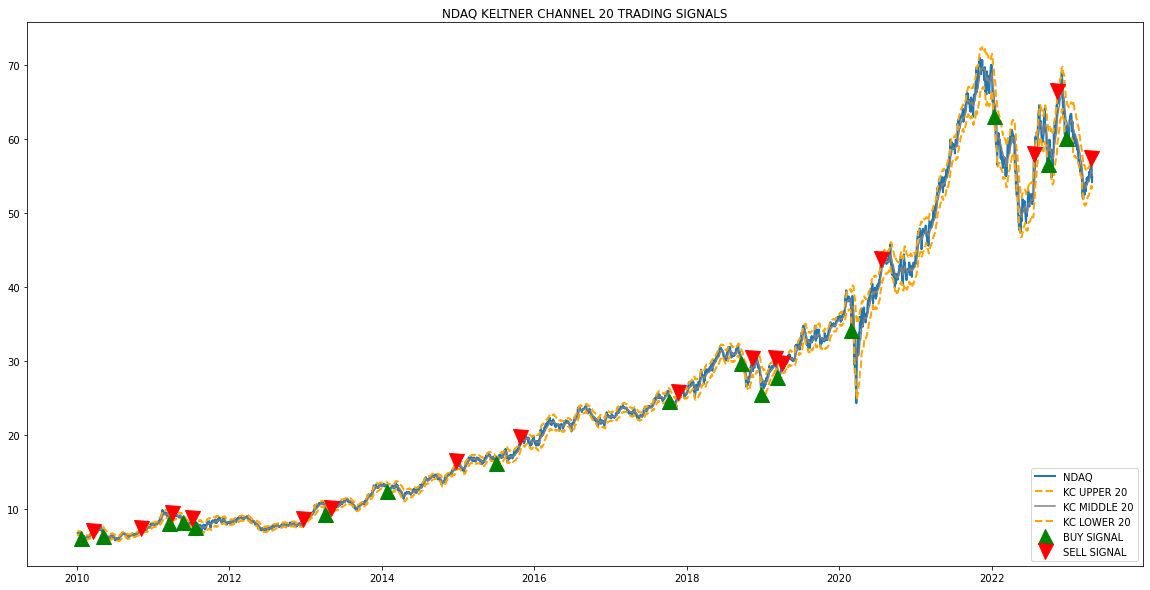

In [229]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df_ndaq['Close'], linewidth = 2, label = 'NDAQ')
plt.plot(df_ndaq['kc_upper'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC UPPER 20')
plt.plot(df_ndaq['kc_middle'], linewidth = 1.5, color = 'grey', label = 'KC MIDDLE 20')
plt.plot(df_ndaq['kc_lower'], linewidth = 2, color = 'orange', linestyle = '--', label = 'KC LOWER 20')
plt.plot(df_ndaq.index, buyprice_kc_ndaq, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'BUY SIGNAL')
plt.plot(df_ndaq.index, sellprice_kc_ndaq, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'lower right')
plt.title('NDAQ KELTNER CHANNEL 20 TRADING SIGNALS')
plt.show()


In [381]:
buy_kc_ndaq=pd.DataFrame(buyprice_kc_ndaq)
buy_kc_ndaq=buy_kc_ndaq.fillna(0)
buy_kc_ndaq=buy_kc_ndaq[~(buy_kc_ndaq == 0).all(axis=1)]
sell_kc_ndaq=pd.DataFrame(sellprice_kc_ndaq)
sell_kc_ndaq=sell_kc_ndaq.fillna(0)
sell_kc_ndaq=sell_kc_ndaq[~(sell_kc_ndaq == 0).all(axis=1)]
buy_kc_ndaq=np.array(buy_kc_ndaq)
sell_kc_ndaq=np.array(sell_kc_ndaq)


def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(sell_kc_ndaq-buy_kc_ndaq)

0.5680895576883332

In [382]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(sell_kc_ndaq-buy_kc_ndaq)

1.824925201484384

In [394]:
#pd.DataFrame(buy_kc_ndaq-sell_kc_ndaq).idxmin()
print("MDD_KC",(buy_kc_ndaq-sell_kc_ndaq).min()/sell_kc_ndaq[14,0]*100,"%")


MDD_KC -14.80421928487986 %


In [418]:
print("CUMM_Return_KC",((sell_kc_ndaq-buy_kc_ndaq)/buy_kc_ndaq).max()*100,"%")

CUMM_Return_KC 32.073961892123634 %


In [230]:
df_ndaq_bb=yf.download("NDAQ",start="2010-01-01",end="2023-05-01")

#Bollinger Bands indicator
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma
df_ndaq_bb["SMA9"]=sma(df_ndaq_bb["Close"],5)

def bollinger_bands(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2.06
    lower_bb = sma - std * 2.06
    return upper_bb, lower_bb

[*********************100%***********************]  1 of 1 completed


In [231]:
df_ndaq_bb['upper_bb'], df_ndaq_bb['lower_bb'] = bollinger_bands(df_ndaq_bb['Close'], df_ndaq_bb['SMA9'], 10)
df_ndaq_bb

,Open,High,Low,Close,Adj Close,Volume,SMA9,upper_bb,lower_bb
Date,,,,,,,,,
2010-01-04,6.640000,6.810000,6.633333,6.746667,5.635402,6514500,NaN,NaN,NaN
2010-01-05,6.643333,6.773333,6.643333,6.766667,5.652107,4445100,NaN,NaN,NaN
2010-01-06,6.733333,6.786667,6.720000,6.763333,5.649324,7340100,NaN,NaN,NaN
2010-01-07,6.750000,6.766667,6.630000,6.673333,5.574149,8498400,NaN,NaN,NaN
2010-01-08,6.676667,6.766667,6.626667,6.743333,5.632617,4347600,6.738667,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-04-24,57.090000,57.209999,56.189999,56.580002,56.580002,1775400,56.602001,58.576338,54.627664
2023-04-25,56.299999,56.430000,55.209999,55.270000,55.270000,2103900,56.534001,58.247183,54.820820
2023-04-26,54.939999,55.279999,53.849998,54.130001,54.130001,2077000,55.888001,57.875780,53.900222


In [232]:
#implementing Bollinger bands
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price_bb = []
    sell_price_bb = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price_bb.append(data[i])
                sell_price_bb.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price_bb.append(np.nan)
                sell_price_bb.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price_bb.append(np.nan)
            sell_price_bb.append(np.nan)
            bb_signal.append(0)
            
    return buy_price_bb, sell_price_bb, bb_signal

buyprice_bb_ndaq, sellprice_bb_ndaq, bb_signal_ndaq = implement_bb_strategy(df_ndaq_bb['Close'], df_ndaq_bb['lower_bb'], df_ndaq_bb['upper_bb'])


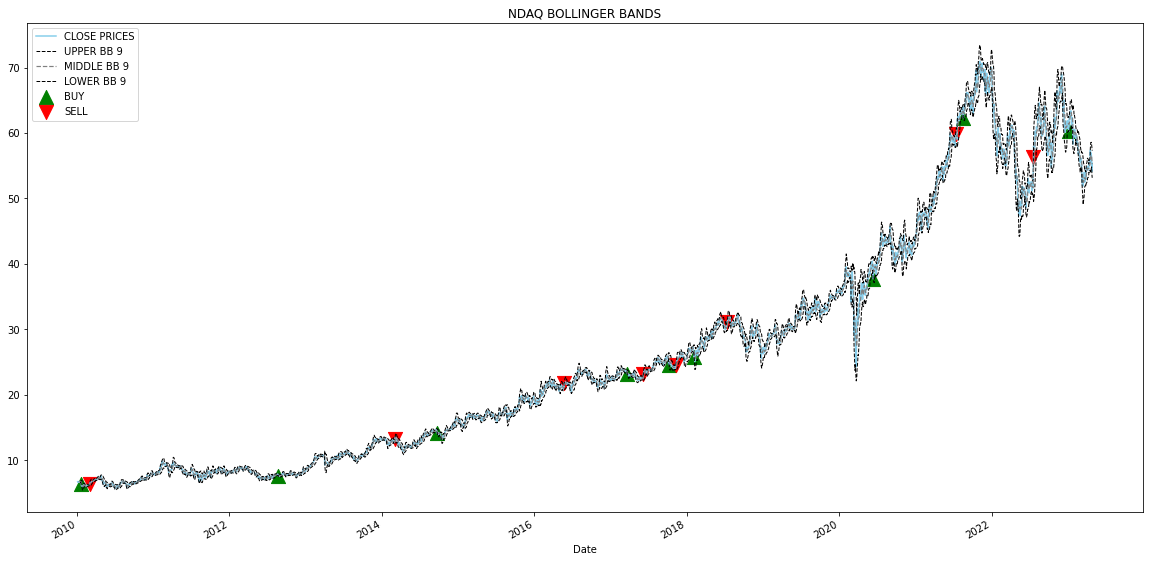

In [233]:
plt.figure(figsize=(20,10))
df_ndaq_bb['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
df_ndaq_bb['upper_bb'].plot(label = 'UPPER BB 9', linestyle = '--', linewidth = 1, color = 'black')
df_ndaq_bb['SMA9'].plot(label = 'MIDDLE BB 9', linestyle = '--', linewidth = 1.2, color = 'grey')
df_ndaq_bb['lower_bb'].plot(label = 'LOWER BB 9', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df_ndaq_bb.index, buyprice_bb_ndaq, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_ndaq_bb.index, sellprice_bb_ndaq, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('NDAQ BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.title('NDAQ BOLLINGER BANDS')
plt.show()

In [386]:
buy_bb_ndaq=pd.DataFrame(buyprice_bb_ndaq)
buy_bb_ndaq=buy_bb_ndaq.fillna(0)
buy_bb_ndaq=buy_bb_ndaq[~(buy_bb_ndaq == 0).all(axis=1)]
sell_bb_ndaq=pd.DataFrame(sellprice_bb_ndaq)
sell_bb_ndaq=sell_bb_ndaq.fillna(0)
sell_bb_ndaq=sell_bb_ndaq[~(sell_bb_ndaq == 0).all(axis=1)]
buy_bb_ndaq=np.array(buy_bb_ndaq)
sell_bb_ndaq=np.array(sell_bb_ndaq)

buy_bb_ndaq=np.delete(buy_bb_ndaq,8,0)

def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(sell_bb_ndaq-buy_bb_ndaq)

0.5542862273838721

In [387]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(sell_bb_ndaq-buy_bb_ndaq)

1.5647650550807886

In [396]:
#pd.DataFrame(buy_bb_ndaq-sell_bb_ndaq).idxmin()
print("MDD_BB",(buy_bb_ndaq-sell_bb_ndaq).min()/sell_bb_ndaq[6,0]*100,"%")

MDD_BB -36.9607548858279 %


In [419]:
print("CUMM_Return_BB",((sell_bb_ndaq-buy_bb_ndaq)/buy_bb_ndaq).max()*100,"%")

CUMM_Return_BB 74.11455901713911 %


In [306]:
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df['Close']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df
df_ndaq_macd = computeMACD(df_ndaq, 52, 112, 52) #optimize parameters

In [307]:
def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACDsig'][i]:         # first occurence of MACD crossing above signal oine
            sell_list.append(np.nan)                 # so first flip above means buy
            if flag != 1:                            # after first occurence I record flip to ignore
                buy_list.append(df['Close'][i])      # from here onward
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACDsig'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = generate_signals(df_ndaq_macd)
df_ndaq_macd['buysig_macd'] = signal[0]
df_ndaq_macd['sellsig_macd'] = signal[1]


In [308]:
df_ndaq_macd

,Open,High,Low,Close,kc_middle,kc_upper,kc_lower,MACD,MACDsig,MACDhist,buysig_macd,sellsig_macd
Date,,,,,,,,,,,,
2010-01-04,6.640000,6.810000,6.633333,6.746667,6.746667,7.100000,6.393333,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.643333,6.773333,6.643333,6.766667,6.757436,7.061647,6.453225,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.733333,6.786667,6.720000,6.763333,6.759711,7.000868,6.518555,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.750000,6.766667,6.630000,6.673333,6.732899,6.983412,6.482386,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.676667,6.766667,6.626667,6.743333,6.735673,6.993386,6.477959,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21,56.340000,57.000000,56.119999,56.970001,55.632264,57.746547,53.517980,-1.619047,-1.077917,-0.541130,NaN,NaN
2023-04-24,57.090000,57.209999,56.189999,56.580002,55.767655,57.874510,53.660800,-1.578356,-1.096801,-0.481555,NaN,NaN
2023-04-25,56.299999,56.430000,55.209999,55.270000,55.696561,57.866732,53.526391,-1.565087,-1.114472,-0.450615,NaN,NaN


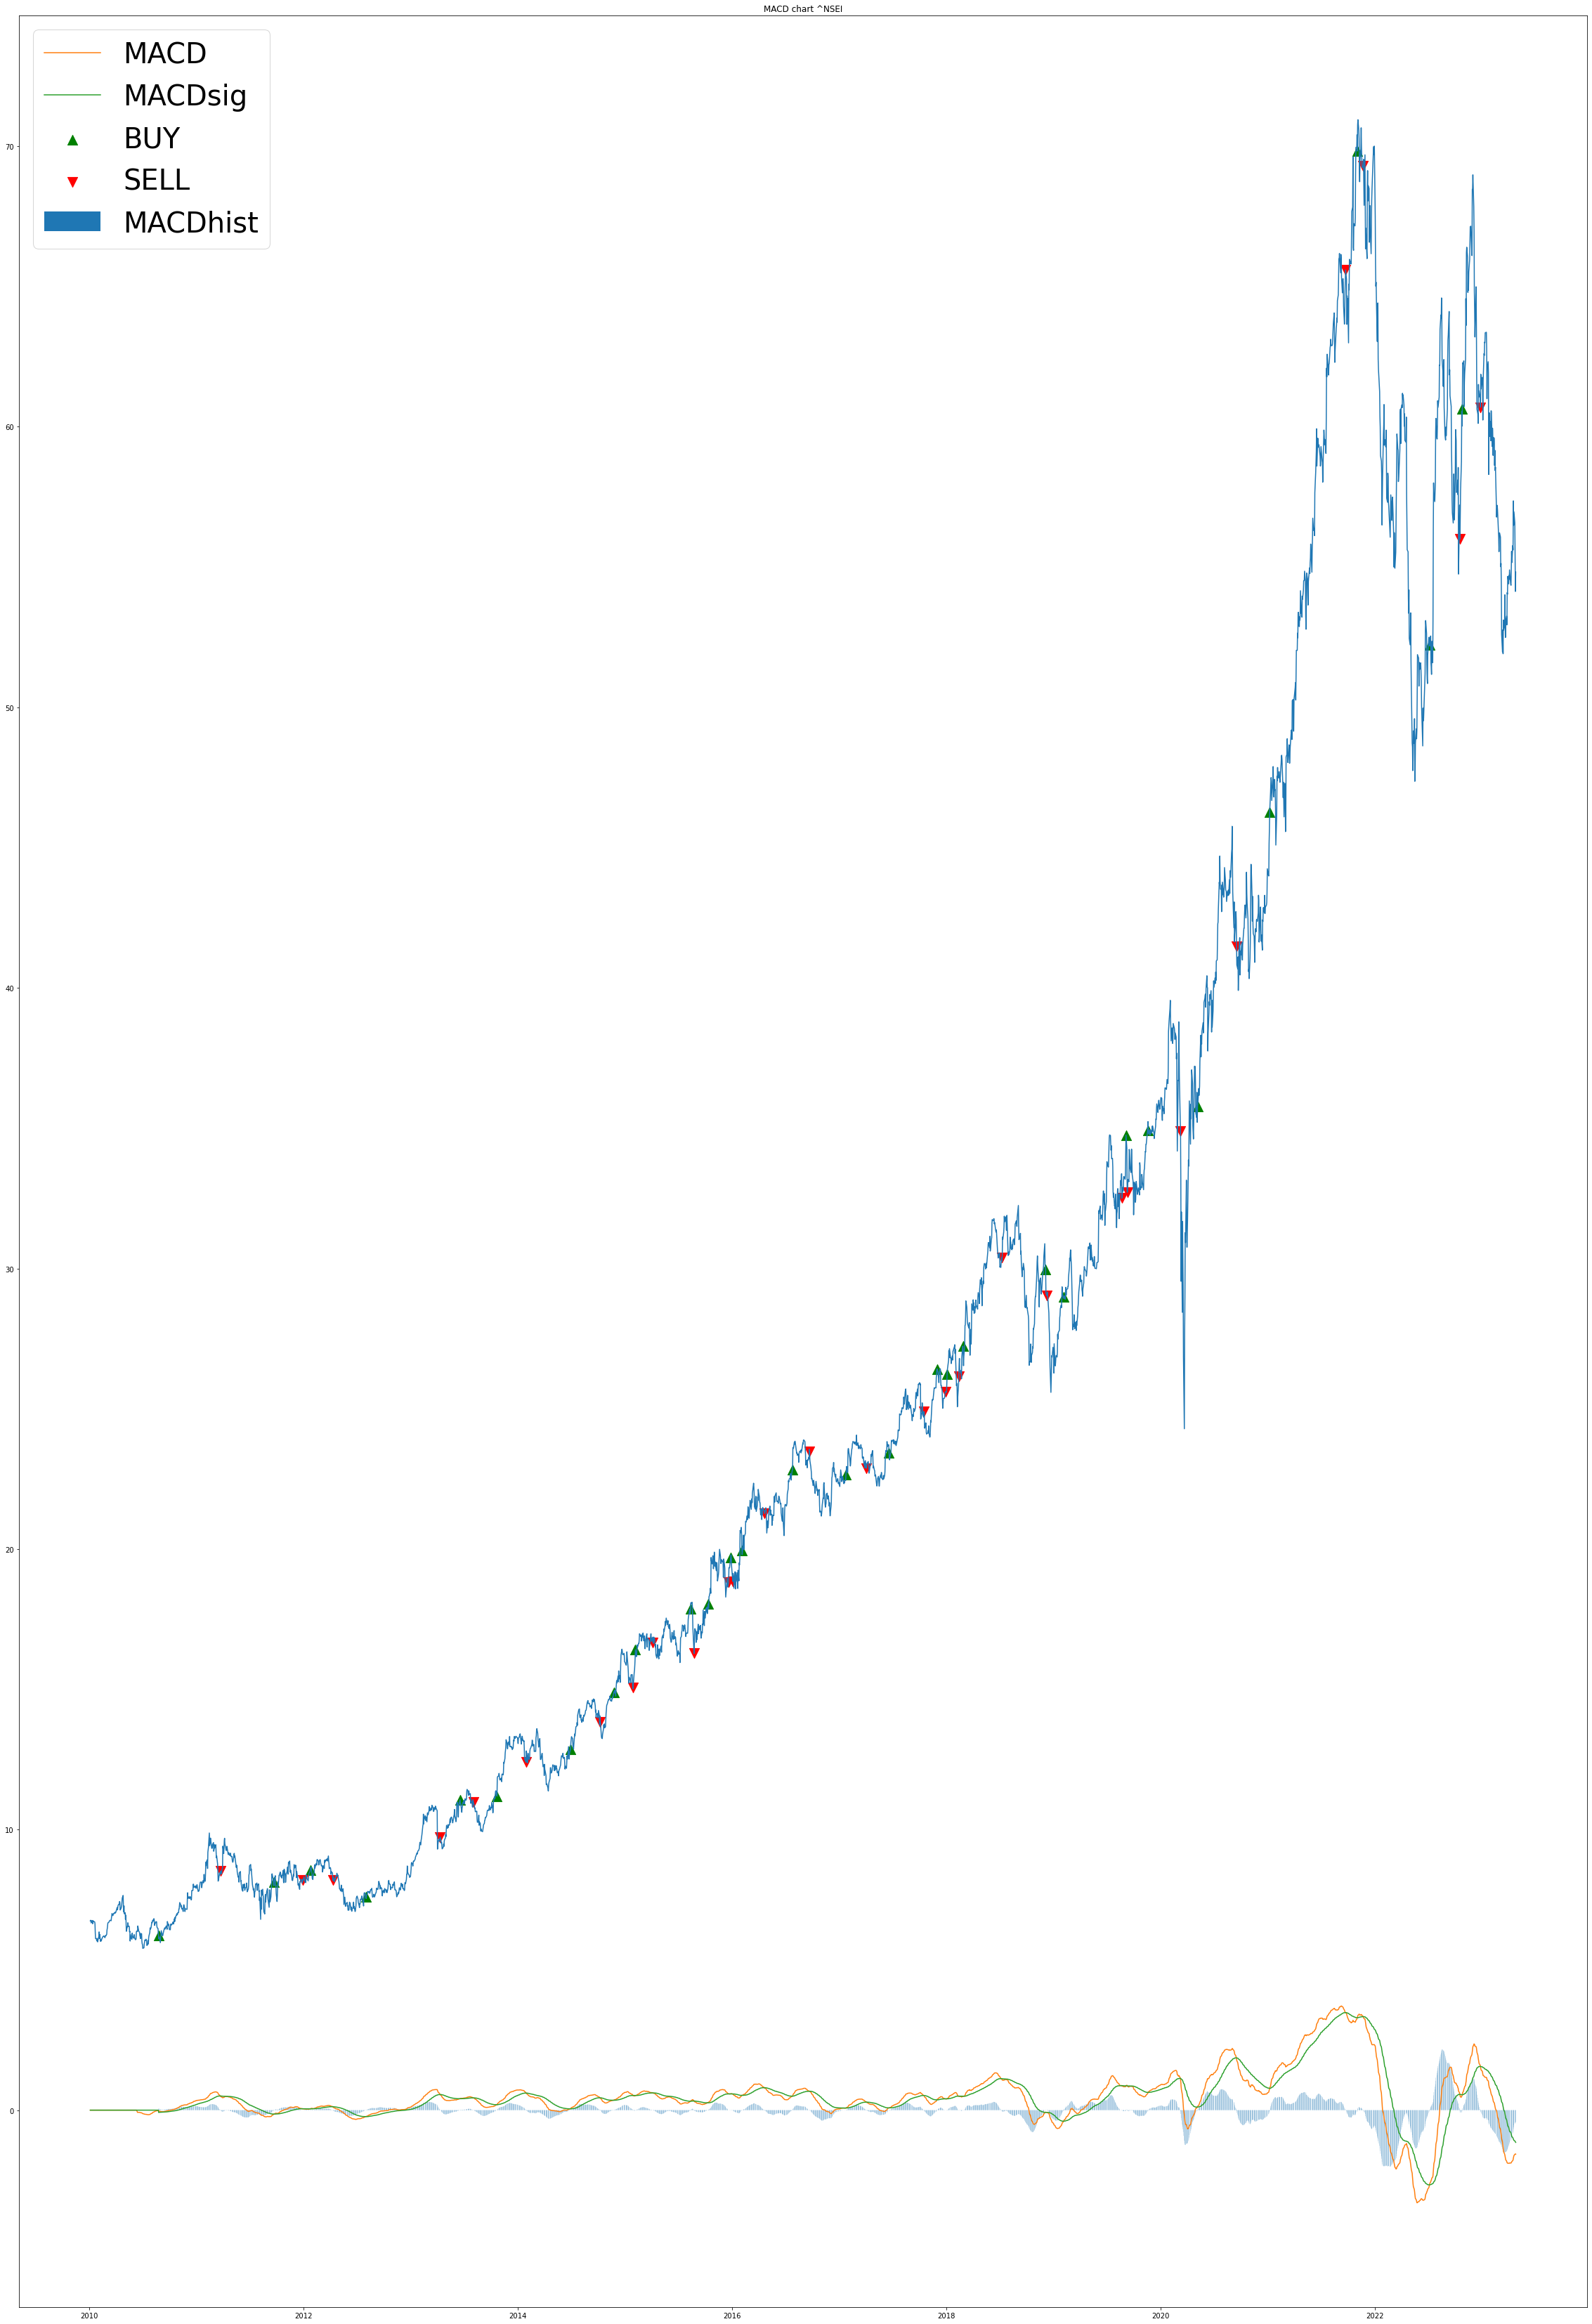

In [310]:
plt.figure(figsize=(40,60))
plt.plot( df_ndaq_macd['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.title('MACD chart ' + str(ticker))
plt.plot(df_ndaq_macd['MACD'].fillna(0),label='MACD')
plt.plot(df_ndaq_macd['MACDsig'].fillna(0),label='MACDsig')
plt.bar( df_ndaq_macd.index,df_ndaq_macd['MACDhist'].fillna(0),width=0.5, snap=False,label='MACDhist')
plt.scatter(df_ndaq_macd.index, df_ndaq_macd.buysig_macd, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_ndaq_macd.index, df_ndaq_macd.sellsig_macd, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.legend(fontsize="40")
plt.show()

In [389]:
df_ndaq_macd.buysig_macd

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
              ..
2023-04-21   NaN
2023-04-24   NaN
2023-04-25   NaN
2023-04-26   NaN
2023-04-27   NaN
Name: buysig_macd, Length: 3352, dtype: float64

In [390]:
buy_macd_ndaq= pd.DataFrame(df_ndaq_macd.buysig_macd)
buy_macd_ndaq=buy_macd_ndaq.fillna(0)
buy_macd_ndaq=buy_macd_ndaq[~(buy_macd_ndaq == 0).all(axis=1)]
sell_macd_ndaq= pd.DataFrame(df_ndaq_macd.sellsig_macd)
sell_macd_ndaq=sell_macd_ndaq.fillna(0)
sell_macd_ndaq=sell_macd_ndaq[~(sell_macd_ndaq == 0).all(axis=1)]
buy_macd_ndaq=np.array(buy_macd_ndaq)
sell_macd_ndaq=np.array(sell_macd_ndaq)

#buy_bb_ndaq=np.delete(buy_bb_ndaq,8,0)

def sharpe_ratio(data, risk_free_rate=0.03):
    # Calculate Average  Return
    mean_daily_return = data.mean()
    # Calculate Standard Deviation
    sigma = data.std()
    return (mean_daily_return/sigma)

sharpe_ratio(sell_macd_ndaq-buy_macd_ndaq)

0.3708963772672252

In [391]:
def sortino_ratio(data):
    # Calculate Average  Return
    mean_return = data.mean()
    # Calculate Standard Deviation
    std_neg = data[data<0].std()
    return mean_return/std_neg
sortino_ratio(sell_macd_ndaq-buy_macd_ndaq)

2.231323103171214

In [399]:
#pd.DataFrame(buy_macd_ndaq-sell_macd_ndaq).idxmin()
print("MDD_MACD",(buy_macd_ndaq-sell_macd_ndaq).min()/sell_macd_ndaq[24,0]*100,"%")

MDD_MACD -29.45929077334451 %


In [420]:
print("CUMM_Return_MACD",((sell_macd_ndaq-buy_macd_ndaq)/buy_macd_ndaq).max()*100,"%")

CUMM_Return_MACD 41.76211310647358 %
